# Whole-exome sequencing mutations

In [1]:
source("~/smartas/pipeline/scripts/variablesAndFunctions.r")

# read switch information
switches <- read.delim("../pancancer/candidateList_info.agg.tsv",row.names=NULL)

# read mutual exclusion info
wes <- read.delim("../pancancer/mutations/gene_functional_mutations_all_switches.txt",row.names=NULL)
wes <- merge(wes,switches)

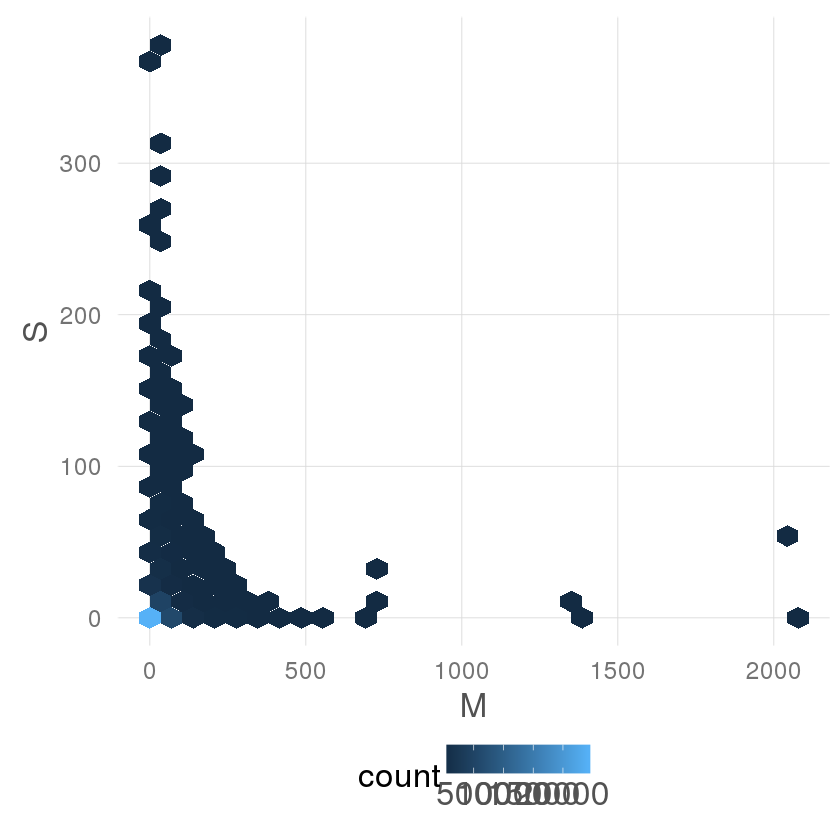

In [2]:
ggplot(wes, aes(x=M,y=S)) + 
    stat_binhex() +
    smartas_theme() +
    theme(legend.position="bottom")

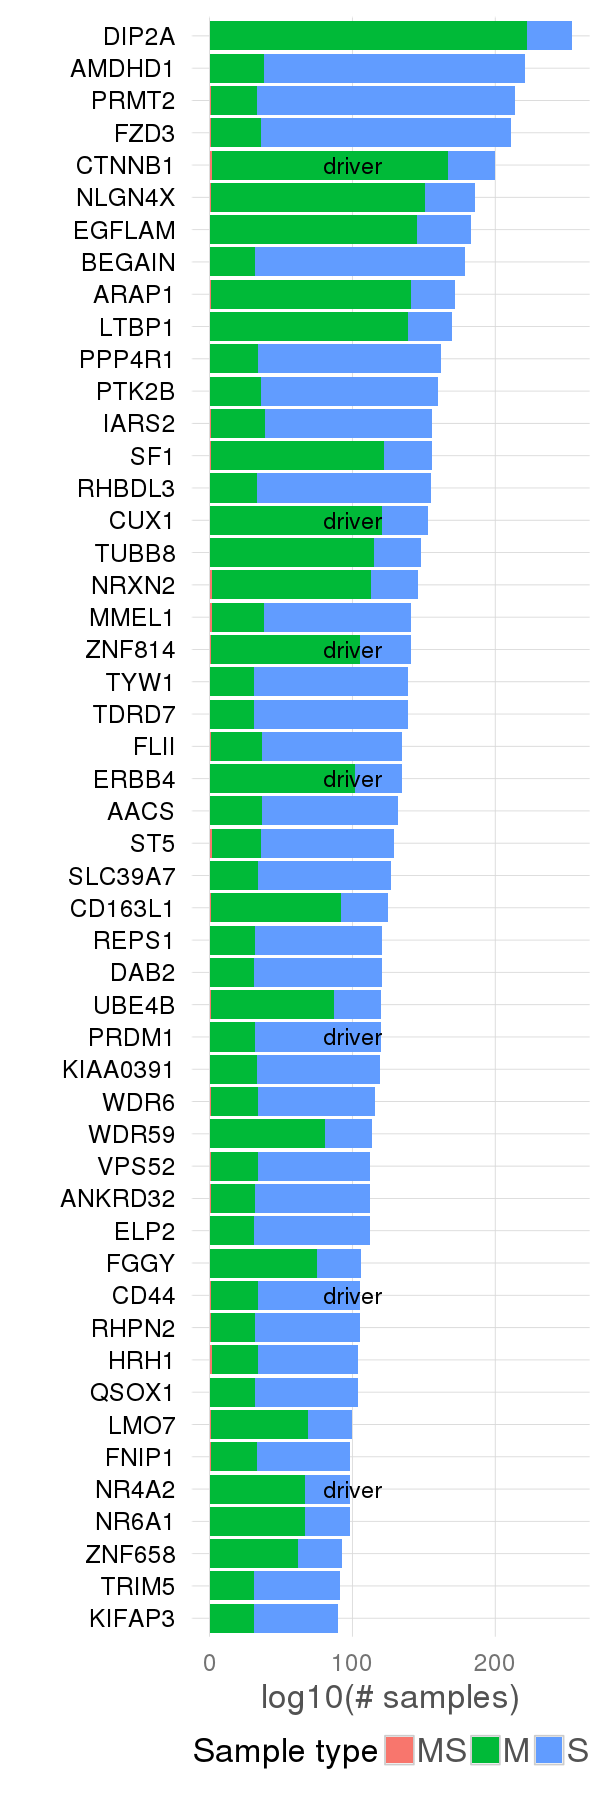

In [5]:
# remove very long genes
df <- subset(wes, M > 30 & S > 30 & ! Symbol %in% c("TTN","OBSCN"))

# we try to maximize M+S and minimize abs(M-S)
df$K <- (df$M + df$S)/(abs(log2(df$M/df$S))+0.0001)
df <- df[order(df$K),]

# pick top 30
df <- df[1:50,]

# plotting transformations
genes <- df$Symbol[order((df$MS+df$M+df$S))]
df$Symbol <- factor(df$Symbol,levels=genes)
df <- df[,c("Symbol","Driver","MS","M","S")]
df <- melt(df,id.vars=c("Symbol","Driver"))
df <- df[df$value!=0,]

options(repr.plot.width=5, repr.plot.height=15)

ggplot() + 
    geom_bar(data=df,aes(x=Symbol,y=value, fill=variable),stat="identity") +
    geom_text(data=unique(subset(df,Driver==1,select=c("Symbol"))),aes(x=Symbol), label="driver", y=100, size=5) +
    coord_flip() +
    labs(x="", y="log10(# samples)", fill="Sample type") +
    smartas_theme() +
    theme(text = element_text(size=20), legend.position="bottom",
          axis.text.y=element_text(hjust=1,vjust=0.5,colour="black"))